'''
This notebook presents the code used in the main study to model the hydrostratigraphy of the Northern Coast of Rio Grande do Sul state, south Brazil.

The idea here is to develop a preliminary geological model of the northern part of Rio Grande do Sul coastline, 
based on the conceptual model and respective paper by Troian, G. C., Reginato, P. A. R., Marquezan, R. G., 
& Kirchheim, R. (2020). Modelo conceitual hidroestratigráfico do sistema  aquifero costeiro no litoral norte 
do Estado do Rio Grande Do Sul, available at https://rigeo.cprm.gov.br/bitstream/doc/21817/1/Troian_etal_2020.pdf. We also use data from vertical electrical sounding from Collischonn, L., & da Camara Rosa, M. L. C. (2022). Genesis of a coastal aquifer in the coastal plain of the Pelotas Basin, southern Brazil: Implications for stratigraphic evolution, available at https://doi.org/10.1016/j.jsames.2022.103801.
'''


In [1]:
# Importing GemPy
import gempy as gp

# Importing auxiliary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import osgeo
import os
import pyvista as pv
from pyvistaqt import BackgroundPlotter


'''If you intend to make depth maps using Gemgis also import it. Be careful to follow instalation instructions from the sites and create a new virtual
environment to run Gemgis, separated from the Gempy environment. In the new Gemgis environment you will need Gempy as well, but for the versions being 
used in this work (Gempy 2.2.12 and Gemgis 1.0.9) they are not entirely compatible, so it is better to have a dedicated virtual environment for Gempy
and another for Gemgis/Gempy.'''

#Importing Gemgis
#import gemgis as gg

No module named 'osgeo'


'If you intend to make depth maps using Gemgis also import it. Be careful to follow instalation instructions from the sites and create a new virtual\nenvironment to run Gemgis, separated from the Gempy environment. In the new Gemgis environment you will need Gempy as well, but for the versions being \nused in this work (Gempy 2.2.12 and Gemgis 1.0.9) they are not entirely compatible, so it is better to have a dedicated virtual environment for Gempy\nand another for Gemgis/Gempy.'

In [2]:
# Return current working directory
cwd = os.getcwd()
data_path = cwd

In [3]:
# Creating the model
geo_model = gp.create_model('RS_northern_coast')

In [4]:
'''Defining the extent of the model and creating a rotation matrix in order to model only the necessary area.

Do not run if real coordinates are needed and high resolution geometries are not necessary.'''

# Define the extent. Adjust depth (z values) as needed, considering extent = np.array([x, y, z])
extent = np.array([[598966, 6774880, -1200],
                   [625836, 6757079, -1200],
                   [575263, 6656908, 20],
                   [548426, 6674680, 20]])

# Defining the rotation angle in degrees
angle_deg = -25

# Converting the angle to radians
angle_rad = np.radians(angle_deg)

# Defining the rotation matrix
cos = np.cos(angle_rad)
sin = np.sin(angle_rad)
rotation_matrix = np.array([[cos, -sin, 0],
                            [sin, cos, 0],
                            [0, 0, 1]])

# Apply the rotation matrix to the extent
rotated_extent = np.dot(extent, rotation_matrix)

# Extract the desired extent values
xmin = np.min(rotated_extent[:, 0])
xmax = np.max(rotated_extent[:, 0])
ymin = np.min(rotated_extent[:, 1])
ymax = np.max(rotated_extent[:, 1])
zmin = np.min(rotated_extent[:, 2])
zmax = np.max(rotated_extent[:, 2])

extent = [xmin, xmax, ymin, ymax, zmin, zmax]
print(extent)

[-2323798.90486205, -2288464.9412167147, 6276324.207090312, 6393260.470000639, -1200.0, 20.0]


In [5]:
'''Creating a rotation matrix for the dataset, and writing the new coordinates (rotated X and rotated Y) to the csv file. Note that here the original
coordinates are the columns 'X_original' and 'Y_original', while the rotated coordinates are 'X' and 'Y' because Gempy looks for the latter when plotting
the points and computing the model. 

Do not run if real coordinates are needed and high resolution geometries are not necessary.'''

# Read in the CSV file - for a model with faults
df = pd.read_csv(data_path + '/Gempy_files/Geomodel_all_data.csv')

#Read in the CSV file - for a model without faults
#df = pd.read_csv(data_path + '/Gempy_files/Geomodel_all_data_NO_FAULTS.csv')

# Extract the x and y coordinates as separate arrays
x_coords = df['X_original'].to_numpy()
y_coords = df['Y_original'].to_numpy()

# Define the rotation matrix
rotation_matrix_points = np.array([[cos, -sin],
                                  [sin, cos]])

# Apply the rotation matrix to the x and y columns of the dataframe
rotated_points = np.dot(df[['X_original', 'Y_original']], rotation_matrix_points)
df['X'] = rotated_points[:, 0]
df['Y'] = rotated_points[:, 1]

# Save the modified dataframe to the original csv file (For a model with the faults)
df.to_csv(data_path + '/Gempy_files/Geomodel_all_data.csv', index=False)

# Save the modified dataframe to the original csv file (For a model withouth the faults)
#df.to_csv(data_path + '/Gempy_files/Geomodel_all_data_NO_FAULTS.csv', index=False)

In [6]:
# Importing data. Adjust parameters as needed.
geo_model = gp.init_data(geo_model,
                         #extent = [542000, 630000, 6667000, 6768000, -1500, 20], #Use this extent in case real coordinates are needed.
                         extent = extent,
                         resolution = [60, 60, 60],
                         #For a model with the faults
                         path_o=data_path + '/Gempy_files/Geomodel_all_data.csv',
                         path_i=data_path + '/Gempy_files/Geomodel_all_data.csv',
                         #For a model without the faults
                         #path_o=data_path + '/Gempy_files/Geomodel_all_data_NO_FAULTS.csv',
                         #path_i=data_path + '/Gempy_files/Geomodel_all_data_NO_FAULTS.csv',
                         )                      


Active grids: ['regular']


/home/luciano/mambaforge/envs/gempy_2.3/lib/python3.10/site-packages/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


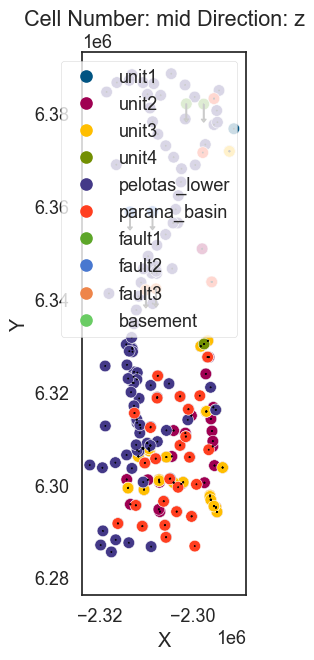

In [7]:
#Check area of interest coordinates
fig_2D = gp.plot_2d(geo_model, direction=['z'])

In [8]:
#Add surfaces and define names to match the ones in the paper. In this case surface and series have the same name, but in the future as more detail is given to the model each series will have more surfaces.

gp.map_stack_to_surfaces(geo_model,
                         {
                          "Fault1": ('fault1'),
                          "Fault2": ('fault2'),
                          "Fault3": ('fault3'),
                          "Unit1": ('unit1'),
                          "Unit2": ('unit2'),
                          "Unit3": ('unit3'),
                          "Unit4": ('unit4'),
                          "Pelotas_Basin_Lower": ('pelotas_lower'),
                          "Parana_Province": ('parana_basin'),
                          "Basement": ('basement')
                         },
                          remove_unused_series=True)

,surface,series,order_surfaces,color,id
6,fault1,Fault1,1,#5DA629,1
7,fault2,Fault2,1,#4878d0,2
8,fault3,Fault3,1,#ee854a,3
0,unit1,Unit1,1,#015482,4
1,unit2,Unit2,1,#9f0052,5
2,unit3,Unit3,1,#ffbe00,6
3,unit4,Unit4,1,#728f02,7
4,pelotas_lower,Pelotas_Basin_Lower,1,#443988,8
5,parana_basin,Parana_Province,1,#ff3f20,9
9,basement,Basement,1,#6acc64,10


In [9]:
#Check if all surfaces are active:
geo_model.surfaces.df

,surface,series,order_surfaces,isBasement,isFault,isActive,hasData,color,vertices,edges,sfai,id
6,fault1,Fault1,1,False,False,False,True,#5DA629,NaN,NaN,NaN,1
7,fault2,Fault2,1,False,False,True,True,#4878d0,NaN,NaN,NaN,2
8,fault3,Fault3,1,False,False,True,True,#ee854a,NaN,NaN,NaN,3
0,unit1,Unit1,1,False,False,True,True,#015482,NaN,NaN,NaN,4
1,unit2,Unit2,1,False,False,True,True,#9f0052,NaN,NaN,NaN,5
2,unit3,Unit3,1,False,False,True,True,#ffbe00,NaN,NaN,NaN,6
3,unit4,Unit4,1,False,False,True,True,#728f02,NaN,NaN,NaN,7
4,pelotas_lower,Pelotas_Basin_Lower,1,False,False,True,True,#443988,NaN,NaN,NaN,8
5,parana_basin,Parana_Province,1,False,False,True,True,#ff3f20,NaN,NaN,NaN,9
9,basement,Basement,1,True,False,True,True,#6acc64,NaN,NaN,NaN,10


In [10]:
#If any surface or series is not active, run the following again. Run cell above again (geo_model.surfaces.df) to check if solved.

gp.map_stack_to_surfaces(geo_model,
                         {
                          "Fault1": ('fault1'),
                          "Fault2": ('fault2'),
                          "Fault3": ('fault3'),
                          "Unit1": ('unit1'),
                          "Unit2": ('unit2'),
                          "Unit3": ('unit3'),
                          "Unit4": ('unit4'),
                          "Pelotas_Basin_Lower": ('pelotas_lower'),
                          "Parana_Province": ('parana_basin'),
                          "Basement": ('basement')
                         },
                          remove_unused_series=True)

,surface,series,order_surfaces,color,id
6,fault1,Fault1,1,#5DA629,1
7,fault2,Fault2,1,#4878d0,2
8,fault3,Fault3,1,#ee854a,3
0,unit1,Unit1,1,#015482,4
1,unit2,Unit2,1,#9f0052,5
2,unit3,Unit3,1,#ffbe00,6
3,unit4,Unit4,1,#728f02,7
4,pelotas_lower,Pelotas_Basin_Lower,1,#443988,8
5,parana_basin,Parana_Province,1,#ff3f20,9
9,basement,Basement,1,#6acc64,10


In [11]:
#Defining the 'Fault_Series' (Torres/Terra de Areia - Posadas) points as fault points. 
#Note that the azimuth of those faults was shifted to consider the -25° angle because of the rotation matrix applied here.
geo_model.set_is_fault([
                        'Fault1',
                        'Fault2', 
                        'Fault3'
                        ])

Fault colors changed. If you do not like this behavior, set change_color to False.
Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault1,1,Fault,True,True,False
Fault2,2,Fault,True,True,False
Fault3,3,Fault,True,True,False
Unit1,4,Erosion,True,False,False
Unit2,5,Erosion,True,False,False
Unit3,6,Erosion,True,False,False
Unit4,7,Erosion,True,False,False
Pelotas_Basin_Lower,8,Erosion,True,False,False
Parana_Province,9,Erosion,True,False,False
Basement,10,Erosion,False,False,False


In [12]:
#Checking fault relationships with geological units

geo_model.faults.faults_relations_df

,Fault1,Fault2,Fault3,Unit1,Unit2,Unit3,Unit4,Pelotas_Basin_Lower,Parana_Province,Basement
Fault1,False,False,False,True,True,True,True,True,True,True
Fault2,False,False,False,True,True,True,True,True,True,True
Fault3,False,False,False,True,True,True,True,True,True,True
Unit1,False,False,False,False,False,False,False,False,False,False
Unit2,False,False,False,False,False,False,False,False,False,False
Unit3,False,False,False,False,False,False,False,False,False,False
Unit4,False,False,False,False,False,False,False,False,False,False
Pelotas_Basin_Lower,False,False,False,False,False,False,False,False,False,False
Parana_Province,False,False,False,False,False,False,False,False,False,False
Basement,False,False,False,False,False,False,False,False,False,False


In [13]:
#Defining the relation between the faults and the other units. In our case, we want the faults to cut only the Parana Basin and the basement.

fr = np.zeros((10, 10))
fr[0, 8] = True
fr[0, 9] = True
fr[1, 8] = True
fr[1, 9] = True
fr[2, 8] = True
fr[2, 9] = True

geo_model.set_fault_relation(fr)

,Fault1,Fault2,Fault3,Unit1,Unit2,Unit3,Unit4,Pelotas_Basin_Lower,Parana_Province,Basement
Fault1,False,False,False,False,False,False,False,False,True,True
Fault2,False,False,False,False,False,False,False,False,True,True
Fault3,False,False,False,False,False,False,False,False,True,True
Unit1,False,False,False,False,False,False,False,False,False,False
Unit2,False,False,False,False,False,False,False,False,False,False
Unit3,False,False,False,False,False,False,False,False,False,False
Unit4,False,False,False,False,False,False,False,False,False,False
Pelotas_Basin_Lower,False,False,False,False,False,False,False,False,False,False
Parana_Province,False,False,False,False,False,False,False,False,False,False
Basement,False,False,False,False,False,False,False,False,False,False


In [14]:
#Check if all surfaces are active:
geo_model.surfaces.df

,surface,series,order_surfaces,isBasement,isFault,isActive,hasData,color,vertices,edges,sfai,id
6,fault1,Fault1,1,False,True,True,True,#527682,NaN,NaN,NaN,1
7,fault2,Fault2,1,False,True,True,True,#527682,NaN,NaN,NaN,2
8,fault3,Fault3,1,False,True,True,True,#527682,NaN,NaN,NaN,3
0,unit1,Unit1,1,False,False,True,True,#015482,NaN,NaN,NaN,4
1,unit2,Unit2,1,False,False,True,True,#9f0052,NaN,NaN,NaN,5
2,unit3,Unit3,1,False,False,True,True,#ffbe00,NaN,NaN,NaN,6
3,unit4,Unit4,1,False,False,True,True,#728f02,NaN,NaN,NaN,7
4,pelotas_lower,Pelotas_Basin_Lower,1,False,False,True,True,#443988,NaN,NaN,NaN,8
5,parana_basin,Parana_Province,1,False,False,True,True,#ff3f20,NaN,NaN,NaN,9
9,basement,Basement,1,True,False,True,False,#6acc64,NaN,NaN,NaN,10


In [15]:
#Check bottom relationships between units:
geo_model.stack

,order_series,BottomRelation,isActive,isFault,isFinite
Fault1,1,Fault,True,True,False
Fault2,2,Fault,True,True,False
Fault3,3,Fault,True,True,False
Unit1,4,Erosion,True,False,False
Unit2,5,Erosion,True,False,False
Unit3,6,Erosion,True,False,False
Unit4,7,Erosion,True,False,False
Pelotas_Basin_Lower,8,Erosion,True,False,False
Parana_Province,9,Erosion,True,False,False
Basement,10,Erosion,False,False,False


In [16]:
#Set onlap relationships between units:
geo_model.set_bottom_relation(["Unit1", 
                               "Unit2", 
                               "Unit3", 
                               "Unit4", 
                               "Pelotas_Basin_Lower",
                               "Parana_Province",
                               'Basement'],
                              ['Onlap',
                               'Onlap',
                               'Onlap', 
                               'Onlap',
                               'Onlap',
                               'Erosion', #Parana_Province
                               'Erosion']) #Basement

,order_series,BottomRelation,isActive,isFault,isFinite
Fault1,1,Fault,True,True,False
Fault2,2,Fault,True,True,False
Fault3,3,Fault,True,True,False
Unit1,4,Onlap,True,False,False
Unit2,5,Onlap,True,False,False
Unit3,6,Onlap,True,False,False
Unit4,7,Onlap,True,False,False
Pelotas_Basin_Lower,8,Onlap,True,False,False
Parana_Province,9,Erosion,True,False,False
Basement,10,Erosion,False,False,False


/home/luciano/mambaforge/envs/gempy_2.3/lib/python3.10/site-packages/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


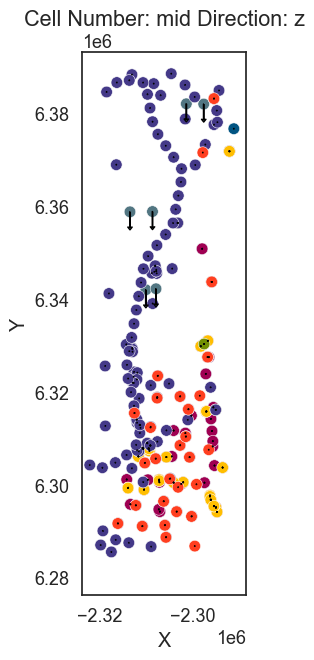

In [17]:
# Plotting points in 2D. Adjust as needed.
gp.plot_2d(geo_model, direction=['z'], ve=1, show_topography=False, legend=False)

In [18]:
# Plotting points in 3D. Adjust as needed.
gp.plot_3d(geo_model, ve=50, plotter_type='background', show_topography=False)

In [19]:
# Setting the interpolator so it can compute the model
gp.set_interpolator(geo_model, 
                    #theano_optimizer='fast_compile', 
                    aesara_optimizer='fast_compile', 
                    verbose=[])

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  3
Compilation Done!
Kriging values: 
                                          values
range                             122164.098533
$C_o$                          355334927.864833
drift equations  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [20]:
#Compute model
gp.compute_model(geo_model)


Lithology ids 
  [10.         10.         10.         ...  9.          8.99999858
  8.9929112 ] 

/home/luciano/mambaforge/envs/gempy_2.3/lib/python3.10/site-packages/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


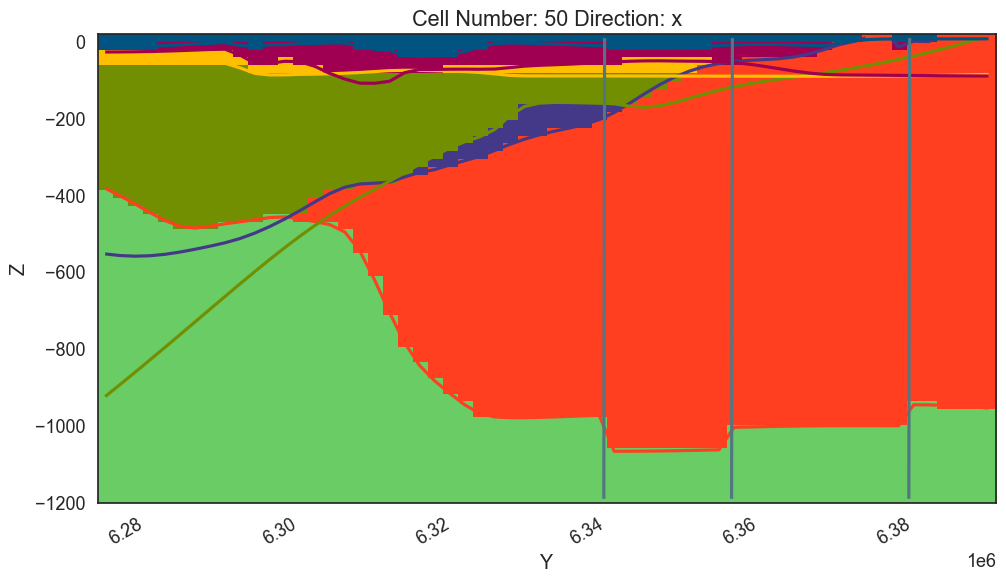

In [21]:
#Plotting the model in 2D with vertical exageration (ve (float); change number as needed):
gp.plot_2d(geo_model, direction=['x'], ve=50, show_topography=False, show_data=False, legend=False, cell_number=[50])

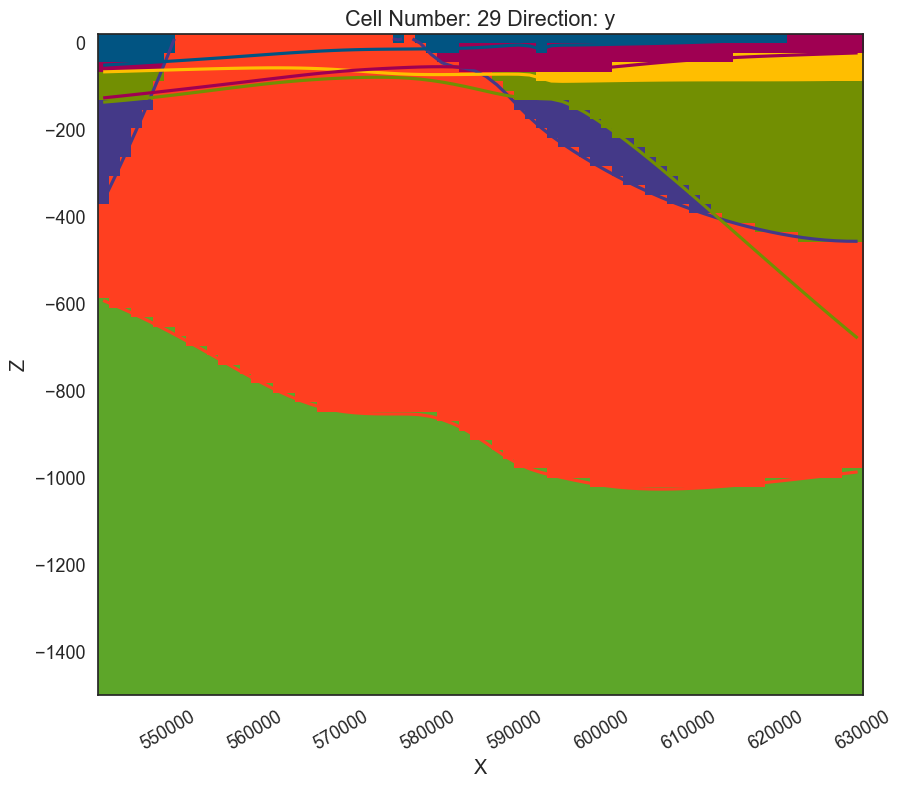

In [16]:
#Plotting the model in 2D with vertical exageration (ve (float); change number as needed):
gp.plot_2d(geo_model, direction=['y'], ve=50, show_topography=False, show_data=False, cell_number=[29])

/home/luciano/mambaforge/envs/gempy_2.3/lib/python3.10/site-packages/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


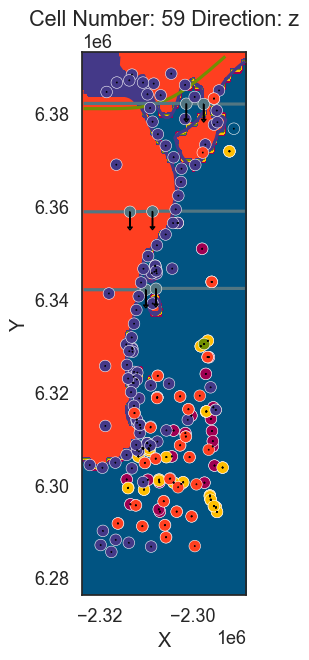

In [22]:
#Plotting the model in 2D with vertical exageration (ve (float); change number as needed):
gp.plot_2d(geo_model, direction=['z'], ve=1, show_topography=False, show_data=True, legend=False, cell_number=[59])

In [23]:
# Plotting the model in 3D with vertical exaggeration (ve (float); change number as needed):
gp.plot_3d(geo_model, ve=50, plotter_type='background', show_topography=False, show_data=False)

In [ ]:
# Adding the topography (DEM from http://www.dsr.inpe.br/topodata/ and merged in one file)
geo_model.set_topography(source='gdal', filepath=data_path+'/topography.tif')

In [ ]:
# Making a 2D visualization:
gp.plot_2d(geo_model, show_topography=True, section_names=['topography'], show_lith=False,
           show_boundaries=False, 
           kwargs_topography={'cmap': 'gray', 'norm': None}
           )
plt.show()

AttributeError: 'NoneType' object has no attribute 'values_2d'

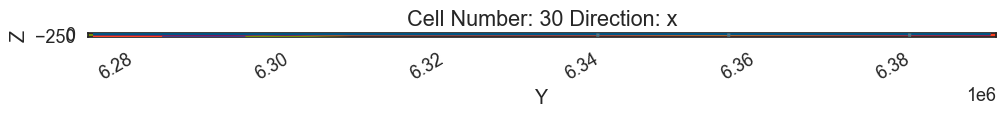

In [27]:
# Plotting topography 2D with vertical exaggeration (ve (float); change number as needed):
gp.plot_2d(geo_model, direction=['x'], ve=200, show_topography=True, cell_number=[30], show_data=False)

In [ ]:
# Plotting topography 3D with vertical exaggeration (ve (float); change number as needed):
gp.plot_3d(geo_model, notebook=False, ve=200, plotter_type='background', show_topography=False, show_data=False)

In [ ]:
#Plotting the model in 2D with vertical exageration (ve (float); change number as needed):
gp.plot_2d(geo_model, direction=['z'], ve=1, show_topography=False, show_data=False, legend=False, cell_number=[40])

In [ ]:
# Access the computed data from Gempy
data = geo_model.solutions.lith_block
data

In [22]:
gp.save_model(geo_model, name='Final_model', path=data_path, compress=False)

Directory already exists, files will be overwritten


True

The code below (depth maps of surfaces) can only be run using Gemgis, another python package available in

https://gemgis.readthedocs.io/en/latest/index.html 
and 
https://github.com/cgre-aachen/gemgis

Be careful to follow instalation instructions from the sites and create a new virtual environment to run Gemgis, separated from the Gempy environment. In the new Gemgis environment you will need Gempy as well, but for the versions being used in this work (Gempy 2.2.12 and Gemgis 1.0.9) they are not entirely compatible, so it is better to have a dedicated virtual environment for Gempy and another for Gemgis/Gempy.

In [28]:
#Creating depth maps of units using Gemgis (based on the tutorial in https://gemgis.readthedocs.io/en/latest/getting_started/tutorial/18_creating_depth_maps_from_gempy_models.html).
dict_unit1 = gg.visualization.create_depth_maps_from_gempy(geo_model=geo_model,
                                                           surfaces='unit1')

mesh1 = dict_unit1['unit1'][0]

In [29]:
#Creating depth maps of units using Gemgis (based on the tutorial in https://gemgis.readthedocs.io/en/latest/getting_started/tutorial/18_creating_depth_maps_from_gempy_models.html).
dict_unit2 = gg.visualization.create_depth_maps_from_gempy(geo_model=geo_model,
         
                                                           surfaces='unit2')
mesh2 = dict_unit2['unit2'][0]

In [30]:
#Creating depth maps of units using Gemgis (based on the tutorial in https://gemgis.readthedocs.io/en/latest/getting_started/tutorial/18_creating_depth_maps_from_gempy_models.html).
dict_unit3 = gg.visualization.create_depth_maps_from_gempy(geo_model=geo_model,
                                                           surfaces='unit3')

mesh3 = dict_unit3['unit3'][0]

In [31]:
#Creating depth maps of units using Gemgis (based on the tutorial in https://gemgis.readthedocs.io/en/latest/getting_started/tutorial/18_creating_depth_maps_from_gempy_models.html).
dict_unit4 = gg.visualization.create_depth_maps_from_gempy(geo_model=geo_model,
                                                           surfaces='unit4')

mesh4 = dict_unit4['unit4'][0]

In [32]:
#Creating depth maps of units using Gemgis (based on the tutorial in https://gemgis.readthedocs.io/en/latest/getting_started/tutorial/18_creating_depth_maps_from_gempy_models.html).
dict_pelotas_lower = gg.visualization.create_depth_maps_from_gempy(geo_model=geo_model,
                                                           surfaces='pelotas_lower')

meshpl = dict_pelotas_lower['pelotas_lower'][0]

In [33]:
#Creating depth maps of units using Gemgis (based on the tutorial in https://gemgis.readthedocs.io/en/latest/getting_started/tutorial/18_creating_depth_maps_from_gempy_models.html).
dict_parana_basin = gg.visualization.create_depth_maps_from_gempy(geo_model=geo_model,
                                                           surfaces='parana_basin')

meshpar = dict_parana_basin['parana_basin'][0]

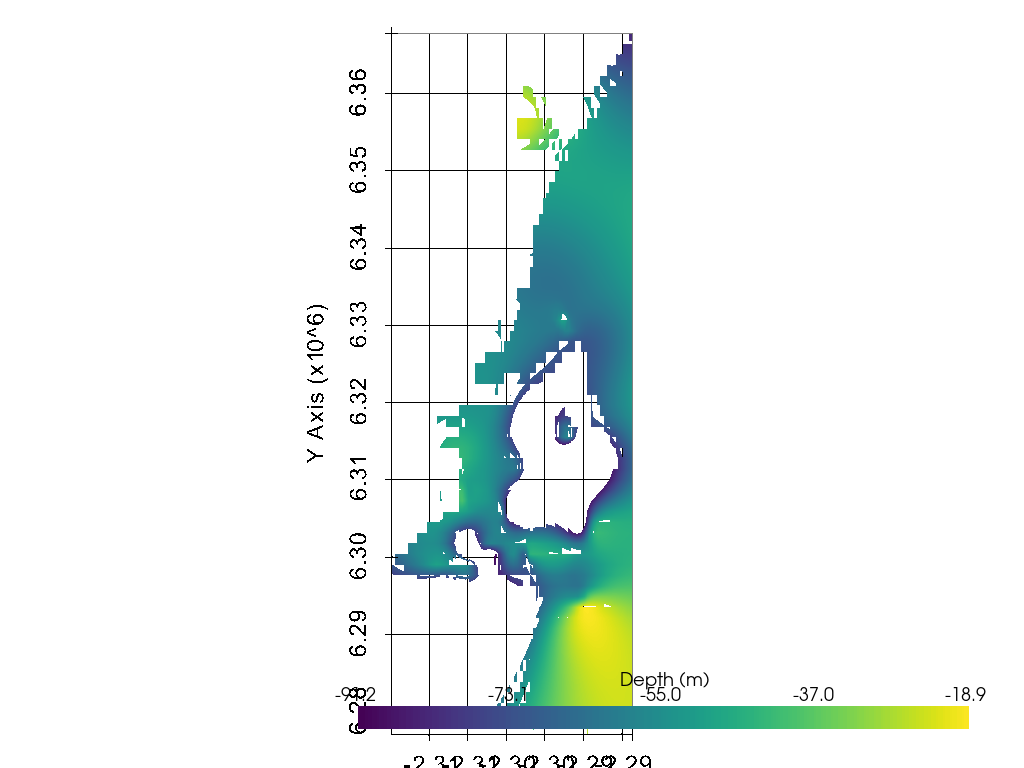

In [38]:
#Plot depth maps of each unit. To change unit being plot, just change first variable in 'p.add_mesh' for the unit you want to plot: mesh1, mesh2, mesh3, mesh4 and meshpl (e.g. 'p.add_mesh(mesh1, scalars=...')

p = pv.Plotter(notebook=True, lighting='none')
p.set_viewup([0, 1, 0])
p.add_mesh(mesh2, scalars='Depth [m]', show_scalar_bar=False)
p.add_bounding_box()
p.add_scalar_bar(title='Depth (m)', color='black')
p.set_background('white')
p.show_grid(color='black')
p.set_scale(zscale=1)
p.show()